# Credit Card Fraud Detection

Import needed packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

Import the data as a dataframe

In [2]:
df_data = pd.read_csv('creditcard.csv')

Look at the first five rows of the data:

In [3]:
df_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Obtain statistical information for the data features:

In [4]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


We can see the features above are not normalised (required min of 0 and max of 1), so we will need to normailise our data before using ML algorithms.

## Analyse the Data

We will use some scatter plots to get a feel for the data and see fraudulent vs legitimate clusters.  We will also look at probability histograms for the 'Amount' and 'Time' features.

<AxesSubplot:xlabel='V1', ylabel='V2'>

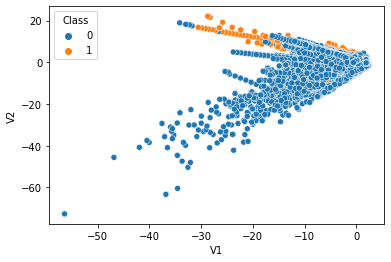

In [18]:
sns.scatterplot(data=df_data,x='V1',y='V2',hue='Class')

<AxesSubplot:xlabel='Amount', ylabel='V20'>

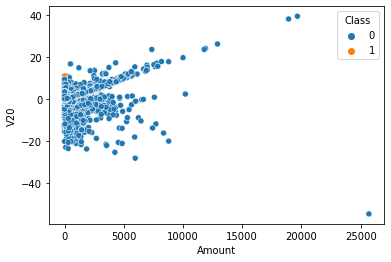

In [19]:
sns.scatterplot(data=df_data,x='Amount',y='V20',hue='Class')

<AxesSubplot:xlabel='V18', ylabel='V20'>

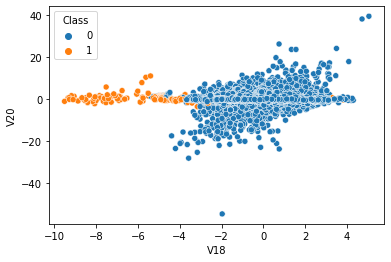

In [20]:
sns.scatterplot(data=df_data,x='V18',y='V20',hue='Class')

The scatterplots reveal some clustered (fraud vs legitimate) behaviour for arbitrary pairing of some features.

In [6]:
#Separate real transactions from fraudulent transactions 
df_real = df_data[df_data['Class']==0]
df_fraud = df_data[df_data['Class']==1]

Text(0.5, 1.0, 'Fraudulent')

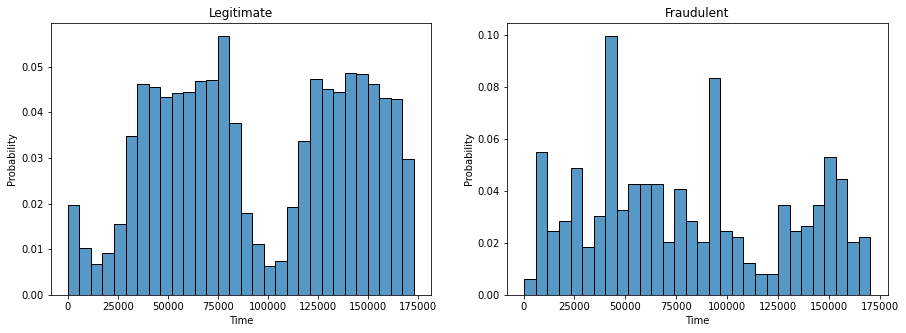

In [7]:
#Plot probability histograms for 'Time'
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df_real['Time'],bins=30,ax = axs[0],stat='probability')
sns.histplot(df_fraud['Time'],bins=30,ax = axs[1],stat='probability')
axs[0].set_title('Legitimate')
axs[1].set_title('Fraudulent')


Clearly the categories possess different distributions for 'Time'. 

(0.0, 1000.0)

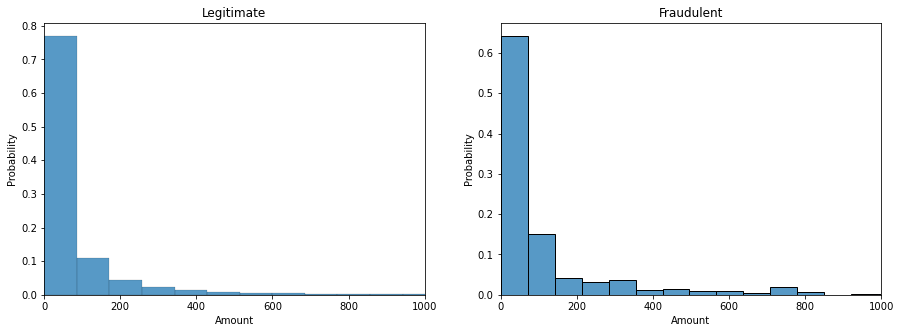

In [8]:
#Plot probability histograms for amount
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df_real['Amount'],bins=300,ax = axs[0],stat='probability')
sns.histplot(df_fraud['Amount'],bins=30,ax = axs[1],stat='probability')
axs[0].set_title('Legitimate')
axs[0].set_xlim([0,1000])
axs[1].set_title('Fraudulent')
axs[1].set_xlim([0,1000])

The differences between 'Amount' for each category are more subtle by comparison. 

(-40.0, 10.0)

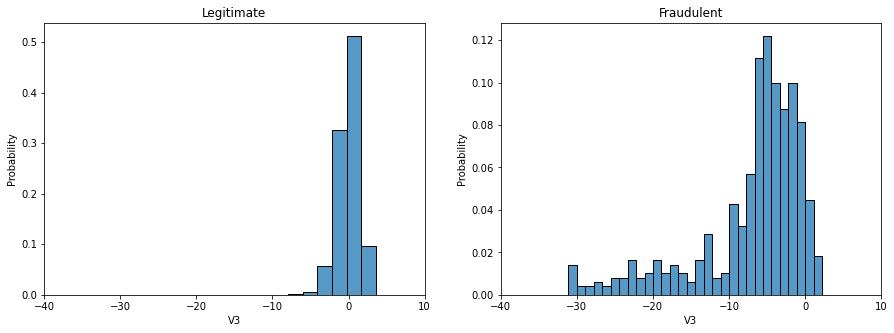

In [9]:
#Plot probability histograms for 'V3'
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df_real['V3'],bins=30,ax = axs[0],stat='probability')
sns.histplot(df_fraud['V3'],bins=30,ax = axs[1],stat='probability')
axs[0].set_title('Legitimate')
axs[1].set_title('Fraudulent')
axs[0].set_xlim([-40,10])
axs[1].set_xlim([-40,10])

Again, we see a difference in the distributions for feature 'V3'.

## Check for Categorical Imbalance 

In [10]:
#Number of legitimate transactions
real_count = df_data['Class'].value_counts()[0]
#Number of fraudulent transactions
fraud_count = df_data['Class'].value_counts()[1] 
print(f'Legitimate transactions is {real_count},Fraudelent transactions is {fraud_count}')

Legitimate transactions is 284315,Fraudelent transactions is 492


Text(0.5, 1.0, 'Categorical Frequency')

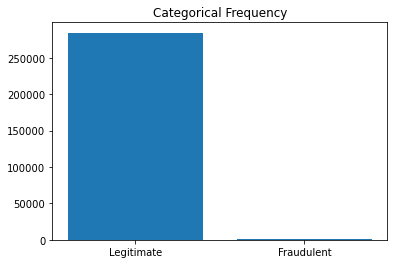

In [11]:
#Plot the categorical frequencies
plt.bar(x=['Legitimate','Fraudulent'],height=[df_data['Class'].value_counts()[0],df_data['Class'].value_counts()[1]])
plt.title('Categorical Frequency')


In [12]:
ratio = round(df_data['Class'].value_counts()[0]/df_data['Class'].value_counts()[1])
print(f'Class imbalance Fraud:Legitimate is approximately 1:{ratio}')

Class imbalance Fraud:Legitimate is approximately 1:578


This data set is heavily imbalanced. Techniques will need to be used to account for the difference, including resampling and consideration of categorical weights in the ML implementations. 

## Train-Test Split

In [13]:
#Create separate dataframe for the labels
labels = df_data.pop('Class')
#train-test-split of 20% test
X_train, X_val,y_train, y_val = train_test_split(df_data, labels, test_size=0.2,random_state=0)

## Normalise the train-val data and keep the min and max

### Get max and min

In [14]:
#Gets the max and min values for each feature
data_max = X_train.max(axis=0)
data_min = X_train.min(axis=0)

### Normalise the Data

In [15]:
#Normalises the train and test data to range [0,1]
X_train = (X_train-data_min)/(data_max-data_min)
X_val = (X_val-data_min)/(data_max-data_min)

## Resample the Data

The large number of features should permit decent resampling of the data.

Note that we wish to avoid excessively discarding data as this contains valuable information for our classifiers.  Instead we will use a combination of under- and over-sampling.

In [16]:
#Undersample the Legit cases
#Randomly sample 50% of the legitimate category to discard
drop_samples_idx = X_train[y_train==0].sample(int(real_count*0.50),random_state=0).index
X_train.drop(drop_samples_idx,inplace=True)
y_train.drop(drop_samples_idx,inplace=True)

In [17]:
X_train.shape

(85688, 30)

In [18]:
y_train.shape

(85688,)

Now we will oversample the fraudelent category.  Excessive oversampling will increase the noise in our training dataset, so we will only target a ratio (major catgory):(minor category) of 1:0.15

In [19]:
from imblearn.over_sampling import SMOTE
pos_neg_ratio = 0.15
sm = SMOTE(sampling_strategy=pos_neg_ratio,random_state=0)
X_res,y_res = sm.fit_resample(X_train,y_train)


Text(0.5, 1.0, 'Categorical Frequency')

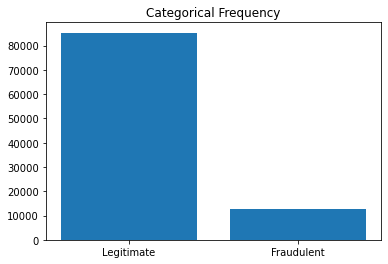

In [20]:
#Plot resampled categorical frequencies
plt.bar(x=['Legitimate','Fraudulent'],height=[y_res.value_counts()[0],y_res.value_counts()[1]])
plt.title('Categorical Frequency')

In [21]:
#Compute how much the fraudulent category has been magnified
fraud_mag = np.round(3500/fraud_count,decimals=2)

print(f'Fraud category has been upsampled to x{fraud_mag}')

Fraud category has been upsampled to x7.11


# Machine Learning

## Base Performance Comparison

Will try:  Random Forest, SVM, XGBoost,Decision Tree, Logistic Regression, Naive Bayes

## Random Forest

In [22]:
#import the classifier
from sklearn.ensemble import RandomForestClassifier
#import the required metrics
from sklearn.metrics import recall_score,precision_score,f1_score,classification_report

In [23]:
#initialise and fit
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_res,y_res)

RandomForestClassifier(random_state=0)

In [24]:
#Predict Test Labels
y_pred = rf_model.predict(X_val)

#Print the metric scores
recall_rf = recall_score(y_val,y_pred)
precision_rf = precision_score(y_val,y_pred)
f1_rf = f1_score(y_val,y_pred)

print(f'Recall: {recall_rf}\nPrecision: {precision_rf}\nF1: {f1_rf}')

Recall: 0.8613861386138614
Precision: 0.7837837837837838
F1: 0.8207547169811322


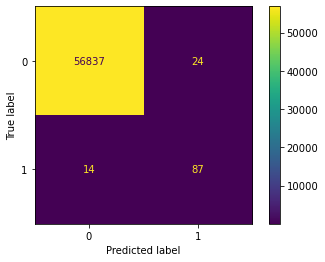

In [25]:
#Import confusion matrix for performance visualisation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


In [26]:
print(classification_report(y_val,y_pred,target_names=['Legit','Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56861
       Fraud       0.78      0.86      0.82       101

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



We wish to minimize false negatives, since ideally we would like to flag potential fraud cases for further investigation.  Hence, "Recall" is the selected metric (tp/tp+fn).  Ideally we would like to keep precision somewhat high to avoid wasting time on legitimate transactions as well.

## SVM

In [27]:
#import and initialise the classifier 
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_res,y_res)

SVC()

In [28]:
#predict the test labels
y_pred = svm_model.predict(X_val)

#Print performance metrics
recall_svm = recall_score(y_val,y_pred)
precision_svm = precision_score(y_val,y_pred)
f1_svm = f1_score(y_val,y_pred)

print(f'Recall: {recall_svm}\nPrecision: {precision_svm}\nF1: {f1_svm}')

Recall: 0.8811881188118812
Precision: 0.52046783625731
F1: 0.6544117647058824


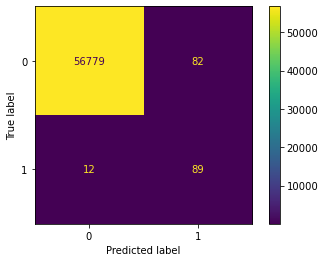

In [29]:
#Diplay the Confusion Matrix
cm = confusion_matrix(y_val,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [30]:
print(classification_report(y_val,y_pred,target_names=['Legit','Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56861
       Fraud       0.52      0.88      0.65       101

    accuracy                           1.00     56962
   macro avg       0.76      0.94      0.83     56962
weighted avg       1.00      1.00      1.00     56962



The SVM Model has quite poor precision (leading to more false positives), but excellent recall (correctly identifying fraudulent cases).

## XGBoost

In [31]:
#import and fit the model 
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
xgb_model.fit(X_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [32]:
#predict the test labels
y_pred = xgb_model.predict(X_val)

#print performance metrics
recall_xgb = recall_score(y_val,y_pred)
precision_xgb = precision_score(y_val,y_pred)
f1_xgb = f1_score(y_val,y_pred)

print(f'Recall: {recall_xgb}\nPrecision: {precision_xgb}\nF1: {f1_xgb}')

Recall: 0.8514851485148515
Precision: 0.7413793103448276
F1: 0.792626728110599


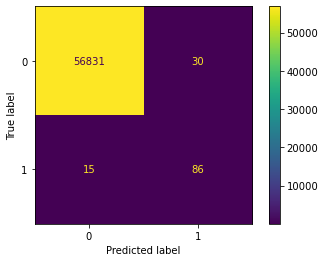

In [33]:
#display the confusion matrix
cm = confusion_matrix(y_val,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [34]:
print(classification_report(y_val,y_pred,target_names=['Legit','Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56861
       Fraud       0.74      0.85      0.79       101

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



XGBClassifier has decent base performance with high recall (85%) and good precision (74%).

## Decision Tree

In [35]:
#import the classifier and fit 
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_res,y_res)

DecisionTreeClassifier()

In [36]:
#predict the labels
y_pred = DT_model.predict(X_val)

#print the performance metrics
recall_dt = recall_score(y_val,y_pred)
precision_dt = precision_score(y_val,y_pred)
f1_dt = f1_score(y_val,y_pred)

print(f'Recall: {recall_dt}\nPrecision: {precision_dt}\nF1: {f1_dt}')

Recall: 0.8217821782178217
Precision: 0.259375
F1: 0.3942992874109264


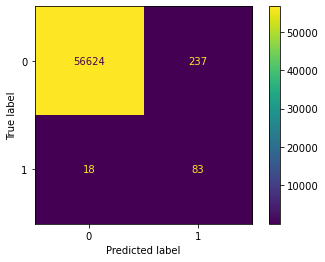

In [37]:
#display the confusion matrix
cm = confusion_matrix(y_val,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [38]:
print(classification_report(y_val,y_pred,target_names=['Legit','Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56861
       Fraud       0.26      0.82      0.39       101

    accuracy                           1.00     56962
   macro avg       0.63      0.91      0.70     56962
weighted avg       1.00      1.00      1.00     56962



The Decision Tree Classifier has decent recall (82%) but poor precision (26%).

## Logistic Regression

In [39]:
#import the classifier and fit
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(max_iter=3000)
LR_model.fit(X_res,y_res)

LogisticRegression(max_iter=3000)

In [40]:
#predict test labels
y_pred = LR_model.predict(X_val)

#print the performance metrics
recall_lr = recall_score(y_val,y_pred)
precision_lr = precision_score(y_val,y_pred)
f1_lr = f1_score(y_val,y_pred)

print(f'Recall: {recall_lr}\nPrecision: {precision_lr}\nF1: {f1_lr}')

Recall: 0.8712871287128713
Precision: 0.3188405797101449
F1: 0.4668435013262599


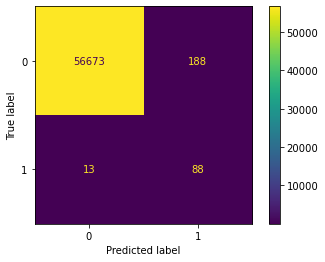

In [41]:
#display the confusion matrix
cm = confusion_matrix(y_val,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [42]:
print(classification_report(y_val,y_pred,target_names=['Legit','Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56861
       Fraud       0.32      0.87      0.47       101

    accuracy                           1.00     56962
   macro avg       0.66      0.93      0.73     56962
weighted avg       1.00      1.00      1.00     56962



Logistic Regression performs well for recall (87%), but suffers from poor precision (32%).  This classifier does outperform the Decision Tree Classifier.

## Naive Bayes

In [43]:
#import the classifier and fit
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_res,y_res)

GaussianNB()

In [44]:
#predict the test labels
y_pred = nb_model.predict(X_val)

#print performance metrics
recall_nb = recall_score(y_val,y_pred)
precision_nb = precision_score(y_val,y_pred)
f1_nb = f1_score(y_val,y_pred)

print(f'Recall: {recall_nb}\nPrecision: {precision_nb}\nF1: {f1_nb}')

Recall: 0.8712871287128713
Precision: 0.06418672501823487
F1: 0.11956521739130437


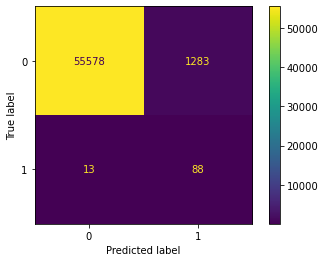

In [45]:
#display the confusion matrix
cm = confusion_matrix(y_val,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [46]:
print(classification_report(y_val,y_pred,target_names=['Legit','Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      0.98      0.99     56861
       Fraud       0.06      0.87      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Naive Bayes possesses excellent recall (87%) but suffers from extremely poor precision (6%), vastly increasing the occurrence of false positives.

## ML Candidates

The ideal candidates for further tuning are "Random Forest" and "XGBoost" as these provide the highest recall without substantially impacting the precision.

# Algorithm Tuning

## Random Forest

### Use StratifiedKFold cross validation to a better view of performance

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [48]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=0)
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
scoring = ['recall','precision','f1','accuracy']
scores = cross_validate(rf_model,X_res,y_res,cv=cv,scoring=scoring,return_train_score=True,verbose=3,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.6s finished


In [50]:
scores

{'fit_time': array([29.27055478, 28.81455302, 29.47855353]),
 'score_time': array([0.35602903, 0.34300184, 0.36402655]),
 'test_recall': array([0.97795497, 0.97796014, 0.97936694]),
 'train_recall': array([1., 1., 1.]),
 'test_precision': array([0.99856322, 0.99475316, 0.99594659]),
 'train_precision': array([1., 1., 1.]),
 'test_f1': array([0.98815166, 0.98628517, 0.98758719]),
 'train_f1': array([1., 1., 1.]),
 'test_accuracy': array([0.99694162, 0.99645227, 0.9967887 ]),
 'train_accuracy': array([1., 1., 1.])}

These results indicate good performance on the StraifiedKFold of the training data, attaining a maximum 97.8% recall.

### Grid Search to Tune the Model

Grid searches have been performed to tune the model, using a metric of recall to target greater identification of fraud cases.

<b>Criterion:</b>

In [55]:
param_grid = {'criterion':['gini','entropy']}
rf_1 = GridSearchCV(estimator=rf_model,param_grid=param_grid,scoring='recall',n_jobs=-1,cv=3,verbose=3)
rf_1.fit(X_res,y_res)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy']}, scoring='recall',
             verbose=3)

In [56]:
rf_1.best_score_

0.9833516075038107

In [57]:
rf_1.best_params_

{'criterion': 'entropy'}

<b>Class Weights:</b>

In [59]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='entropy')
param_grid = {'class_weight' : [{0:1,1:8},{0:1,1:6.667},{0:1,1:6},None]}
rf_2 = GridSearchCV(estimator=rf_model,param_grid=param_grid,scoring='recall',n_jobs=-1,cv=3,verbose=3)
rf_2.fit(X_res,y_res)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 8}, {0: 1, 1: 6.667},
                                          {0: 1, 1: 6}, None]},
             scoring='recall', verbose=3)

In [60]:
rf_2.best_score_

0.9862434537412378

In [61]:
rf_2.best_params_

{'class_weight': {0: 1, 1: 6.667}}

<b>Min Samples Split and Min Samples Leaf:</b>

In [72]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='entropy',class_weight={0:1,1:6.667})
param_grid = {'min_samples_split' : [2,3,5],'min_samples_leaf' : [1,2,3]}
rf_3 = GridSearchCV(estimator=rf_model,param_grid=param_grid,scoring='recall',n_jobs=-1,cv=3,verbose=3)
rf_3.fit(X_res,y_res)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 6.667},
                                              criterion='entropy'),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5]},
             scoring='recall', verbose=3)

In [73]:
rf_3.best_score_

0.9875722627052225

In [74]:
rf_3.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 5}

### Tuned Model

In [87]:
#Adjust weights for the full dataset case
rf_tuned = RandomForestClassifier(n_estimators=200,criterion='entropy',class_weight={0:1,1:578},min_samples_leaf=2,
                                  min_samples_split=5,n_jobs=-1,random_state=0)
rf_tuned.fit(X_res,y_res)

RandomForestClassifier(class_weight={0: 1, 1: 578}, criterion='entropy',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=0)

In [88]:
#predict test labels and print metrics
y_pred = rf_tuned.predict(X_val)

recall_rf = recall_score(y_val,y_pred)
precision_rf = precision_score(y_val,y_pred)
f1_rf = f1_score(y_val,y_pred)

print(f'Recall: {recall_rf}\nPrecision: {precision_rf}\nF1: {f1_rf}')

Recall: 0.8613861386138614
Precision: 0.8055555555555556
F1: 0.832535885167464


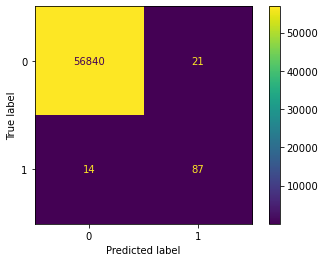

In [89]:
cm = confusion_matrix(y_val,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [90]:
print(classification_report(y_val,y_pred,target_names=['Legit','Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56861
       Fraud       0.81      0.86      0.83       101

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Improvement from Tuning

Untuned - Recall: 86%, Precision: 78%, F1: 82%

Tuned - Recall: 86%, Precision: 81%, F1: 83%

Compared to the untuned model, we see no improvements in Fraud Recall.  Fraud Precision has increased 3%, decreasing the number of false positives.  We can adjust the probability limits to detect more fraud cases at the cost of more false postives.  This adjustment depends on the resources available to investigate potential fraud cases within the business.

## XGBoost

In [156]:
#define the model to be tuned
xgb_tune = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',nthread=1,
                             predictor='gpu_predictor',tree_method='gpu_hist')

In [157]:
#Use Randomized Search to tune the model w.r.t. precision
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'scale_pos_weight':[1,5,6.677,8,10]
        }

xgb_rand = RandomizedSearchCV(estimator=xgb_tune,param_distributions=random_grid,n_iter=50,cv=5,verbose=4,
                              n_jobs=-1,scoring='recall')
#Train the model
xgb_rand.fit(X_res,y_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.02, max_bin=None,...
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parall

In [158]:
xgb_rand.best_score_

0.997655120241274

In [159]:
xgb_rand.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 10,
 'min_child_weight': 5,
 'max_depth': 5,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

Randomised search results hit the maximum scale_pos_weight and max_depth. This encourages further investigation via GridSearchCV.

### Grid Search Scale Postive Weight and Max Depth

In [183]:
#Declare intermediate XGB CLassifier from randomized search results
xgb_int = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
    nthread=1,predictor='gpu_predictor',tree_method='gpu_hist',subsample=0.8,min_child_weight=5
                            ,gamma=0.5,colsample_bytree=0.8)
#Define search grid for scale_pos_weight
param_grid = {'scale_pos_weight':[10,20,30,40],'max_depth':[5,10]}

#Use Grid Search to identify the best performing scaling and max_depth
xgb_grid = GridSearchCV(estimator=xgb_int,param_grid=param_grid,scoring='recall',n_jobs=-1,cv=5,verbose=3)
xgb_grid.fit(X_res,y_res)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0.5, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.02, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
         

In [184]:
xgb_grid.best_score_

0.9996873778819853

In [185]:
xgb_grid.best_params_

{'max_depth': 5, 'scale_pos_weight': 40}

### Tuned Model

### Case #1: scale_pos_weight=40

In [192]:
xgb_best = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
    nthread=1,predictor='gpu_predictor',tree_method='gpu_hist',subsample=0.8,scale_pos_weight=40,min_child_weight=5,
    max_depth=5,gamma=0.5,colsample_bytree=0.8)
xgb_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=1, nthread=1, num_parallel_tree=1,
              predictor='gpu_predictor', random_state=0, reg_alpha=0, ...)

In [193]:
y_pred = xgb_best.predict(X_val)

recall_xgb_best = recall_score(y_val,y_pred)
precision_xgb_best = precision_score(y_val,y_pred)
f1_xgb_best = f1_score(y_val,y_pred)

print(f'Recall: {recall_xgb_best}\nPrecision: {precision_xgb_best}\nF1: {f1_xgb_best}')

Recall: 0.8613861386138614
Precision: 0.75
F1: 0.8018433179723503


### Confusion Matrix

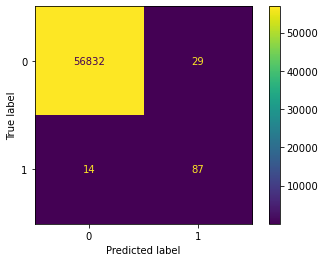

In [194]:
cm = confusion_matrix(y_val,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [195]:
print(classification_report(y_val,y_pred,target_names=['Legit','Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56861
       Fraud       0.75      0.86      0.80       101

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



### Case #2:  scale_pos_weight=30

In [196]:
xgb_best = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
    nthread=1,predictor='gpu_predictor',tree_method='gpu_hist',subsample=0.8,scale_pos_weight=30,min_child_weight=5,
    max_depth=5,gamma=0.5,colsample_bytree=0.8)
xgb_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=1, nthread=1, num_parallel_tree=1,
              predictor='gpu_predictor', random_state=0, reg_alpha=0, ...)

In [197]:
y_pred = xgb_best.predict(X_val)

recall_xgb_best = recall_score(y_val,y_pred)
precision_xgb_best = precision_score(y_val,y_pred)
f1_xgb_best = f1_score(y_val,y_pred)

print(f'Recall: {recall_xgb_best}\nPrecision: {precision_xgb_best}\nF1: {f1_xgb_best}')

Recall: 0.8613861386138614
Precision: 0.7699115044247787
F1: 0.8130841121495327


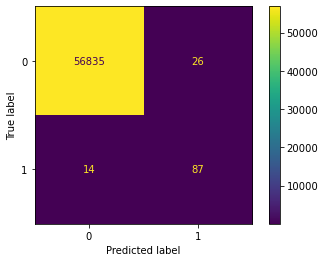

In [198]:
cm = confusion_matrix(y_val,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [199]:
print(classification_report(y_val,y_pred,target_names=['Legit','Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56861
       Fraud       0.77      0.86      0.81       101

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



### Remarks:  

While using scale_pos_weight=40 attained the highest recall in the grid seach, the testing data indicates no improvement in recall and a decrease in the precision (scale_pos_weight=30 -> precision=77%,scale_pos_weight=40 -> precision=75%).  This indicates overfitting for the scaling=40 case, so scalling=30 is accepted as the best model.

### Improvement from Tuning

Untuned - Recall: 85%, Precision: 74%, F1: 79% 

Tuned - Recall: 86%, Precision: 77%, F1: 81% 

By tuning the XGBClassifier, we have improved the precision of the model and slightly improved the recall of the model.  This suggests less company resources will be wasted investigating flagged legitimate transactions.  

# Comparing the Two Final Models

<b>Random Forest</b> - Recall: 86%, Precision: 81%, F1: 83%

<b>XGBoost</b> - Recall: 86%, Precision: 77%, F1: 81%

Of the two models, both demonstrate the same ability to correctly label fraudulent transactions (recall) from the test set.  However, the Random Forest Classifier demonstrates 4% higher precision, and hence does not produce as many false postives as the XGBoost model.  These indicators lead us to conclude the Random Forest Classifer is the best model.